#Simulating EES with the Iterated Prisoner's Dilemma
This work...

## Requirements
PlantUML for showing uml diagrams

In [16]:
# PlantUML setup
%install_ext https://gist.githubusercontent.com/sberke/7360a4b7aa79aefccbb0/raw/f19a8910c847421977daa7a8c893bb7d77aa78b5/plantuml_magics.py
%load_ext plantuml_magics

import glob
glob.glob(r'./*.jar')

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics
The plantuml_magics extension is already loaded. To reload it, use:
  %reload_ext plantuml_magics


['./plantuml.jar']

In [6]:
from IPython.display import display, HTML

## Prisoner's Dilemma

What is the _**Prisoner's Dilemma**_ (**PD**)
 <table style="width:200px">
  <tr>
    <td></td>
    <td><strong>C</strong></td>
    <td><strong>D</strong></td>
  </tr>
  <tr>
    <td><strong>C</strong></td>
    <td><em>R,R</em></td>
    <td><em>S,T</em></td>
  </tr>
  <tr>
    <td><strong>D</strong></td>
    <td><em>T,S</em></td>
    <td><em>P,P</em></td>
  </tr>
</table> 

##Iterated Prisoner's Dilemma
What is the _**Iterated Prisoner's Dilemma**_ (IPD)

###Axelrod's 1979 tournament


###Axelrod's 1982 tournament

##Modeling

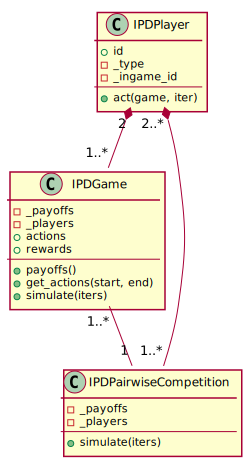

In [40]:
%%plantuml uml/class-diagram-1

@startuml
class IPDPlayer{
    +id
    -_type
    -_ingame_id
    --
    +act(game, iter)
}
class IPDGame{
    -_payoffs
    -_players
    +actions
    +rewards
    --
    +payoffs()
    +get_actions(start, end)
    +simulate(iters)
}
class IPDPairwiseCompetition{
    -_payoffs
    -_players
    --
    +simulate(iters)
}
IPDPlayer "2" *-- "1..*" IPDGame
IPDGame "1..*" -- "1" IPDPairwiseCompetition
IPDPairwiseCompetition "1..*" --* "2..*" IPDPlayer
@enduml 

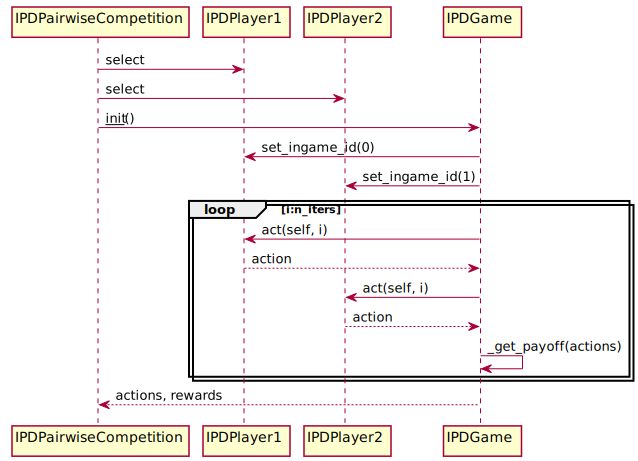

In [39]:
%%plantuml uml/sequence-competition

@startuml
IPDPairwiseCompetition -> IPDPlayer1: select
IPDPairwiseCompetition -> IPDPlayer2: select
IPDPairwiseCompetition -> IPDGame: __init__()
IPDGame -> IPDPlayer1: set_ingame_id(0)
IPDGame -> IPDPlayer2: set_ingame_id(1)    
    loop i:n_iters
        IPDGame -> IPDPlayer1: act(self, i)
        IPDPlayer1 --> IPDGame: action
        IPDGame -> IPDPlayer2: act(self, i)
        IPDPlayer2 --> IPDGame: action
        IPDGame -> IPDGame: _get_payoff(actions)
    end
    IPDGame --> IPDPairwiseCompetition: actions, rewards
@enduml 

##Simulating Player types

##Where is the emergence?